In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [4]:
!pip install seaborn

In [3]:
df = pd.read_csv('../output/output.txt', sep=' ', header=None)
df.columns = ['t1', 't2', 'fom']
df

,t1,t2,fom
0,1100,1100,0.000000
1,1100,1200,0.422271
2,1100,1300,0.762029
3,1100,1400,0.992790
4,1100,1500,1.151350
...,...,...,...
2596,4500,5500,0.520512
2597,4500,5600,0.627724
2598,4500,5700,0.489606
2599,4500,5800,0.414069


In [6]:
# Find t1/t2 with the best FOM
best_fom = df['fom'].max()
best_t1 = df[df['fom'] == best_fom]['t1'].values[0]
best_t2 = df[df['fom'] == best_fom]['t2'].values[0]
print(best_t1, best_t2, best_fom)

1500 2700 2.72378


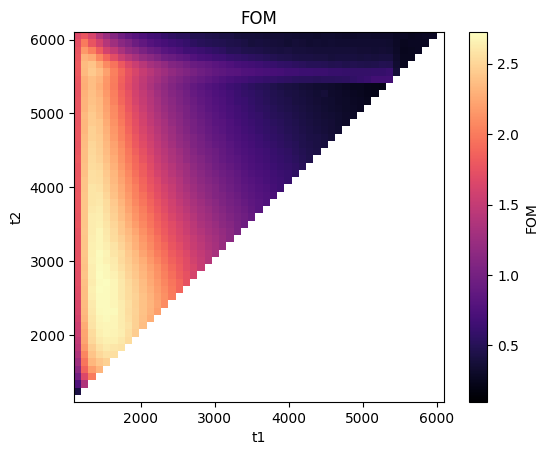

In [8]:
# Pivot so that t2 becomes the index (rows) and t1 becomes the columns
fom_matrix = df.pivot(index='t2', columns='t1', values='fom')

# Optionally, specify extent so that axes reflect the actual t1 and t2 values
extent = [df.t1.min(), df.t1.max(), df.t2.min(), df.t2.max()]

#Set FOM=0.0 to white
plt.set_cmap('magma')
cmap = plt.get_cmap()
cmap.set_under('white')
plt.imshow(fom_matrix, cmap=cmap, origin='lower', extent=extent, vmin=0.1)


plt.colorbar(label='FOM')
plt.xlabel('t1')
plt.ylabel('t2')
plt.title('FOM')
plt.show()

In [7]:
plt.contourf(fom_matrix.columns, fom_matrix.index, fom_matrix, levels=50, cmap='magma')
plt.colorbar(label='FOM')

NameError: name 'fom_matrix' is not defined

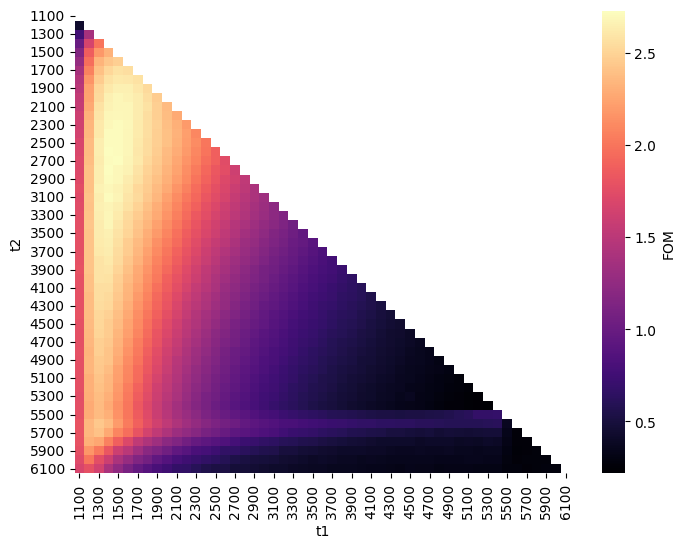

In [11]:
import seaborn as sns

plt.figure(figsize=(8, 6))
sns.heatmap(fom_matrix, cmap='magma', cbar_kws={'label': 'FOM'}, mask=fom_matrix<=0)
plt.xlabel('t1')
plt.ylabel('t2')

plt.savefig('heatmap.png')